###Feature Engineering Unstructured Data (Audio & Wave Files)

This assignment focuses on analyzing and plotting the following audio features:

* MFCC (Mel-Frequency Cepstral Coefficients): Captures the power spectrum, crucial for speech processing.
* Spectrogram: Visualizes the evolution of frequency content over time.
* Chromagram: Shows energy distribution across pitch classes, aiding in harmonic analysis.
* Mel Spectrogram: Scales frequencies based on human perception, highlighting important sounds.
* Short-term Fourier Transform (STFT): Examines frequency changes in non-stationary signals.
* Beat Tracking: Identifies rhythmic patterns and tempo in music.
* Constant-Q Transform (CQT): Provides enhanced frequency resolution for musical analysis.


Using the these audio files

* Kepler: Star KIC12268220C Light Curve Waves to Sound
* NASA - Kepler: Star KIC7671081B Light Curve Waves to
* NASA - Whistler Waves
* Johns Hopkins APL - Parker Solar Probe - Whistler Mode Waves 2
* NASA - Audio from NASA’s Juno Mission: Europa Flyby

I've ploted them in order, please refer the below code.

* NAME: Manjunatha Inti
* Student ID: 018192187

In [1]:
!pip install librosa audioread matplotlib

In [2]:
#Importing the libraries
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Function to load MP3 audio files
def load_audio(file_path):
    y, sr = librosa.load(file_path, sr=None)  # Load MP3 audio file
    return y, sr
    """
    this function Returns ->
    y (np.ndarray) where it gives Audio time series
    sr (int) it gives Sample rate of the audio file.
    """

In [4]:
# To calculate_features
def calculate_features(y, sr):

    features = {}

    # MFCC
    features['mfcc'] = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

    # Spectrogram (Regular STFT-based)
    features['spectrogram'] = np.abs(librosa.stft(y))

    # Mel Spectrogram
    features['mel_spectrogram'] = librosa.feature.melspectrogram(y=y, sr=sr)

    # Chromagram
    features['chroma'] = librosa.feature.chroma_stft(y=y, sr=sr)

    # Short-term Fourier Transform (STFT)
    features['stft'] = np.abs(librosa.stft(y))

    # Beat Tracking
    tempo, beats = librosa.beat.beat_track(y=y, sr=sr)
    features['tempo'] = float(tempo)  # Ensure tempo is a float
    features['beats'] = beats

    # Constant-Q Transform (CQT)
    features['cqt'] = np.abs(librosa.cqt(y, sr=sr))

    return features
# Returns the Dictionary containing calculated features

In [5]:
# Updated plot_features function
def plot_features(features, sr, file_name):

    """
    This function plots the different audio features in a combined 3x3 grid.
    The grid inclues the follwing plots MFCC, Spectrogram, Chromagram, Mel Spectrogram,
    STFT, Beat Tracking, and CQT.
    """

    fig, axs = plt.subplots(3, 3, figsize=(16, 16))
    fig.suptitle(f'Audio Feature Analysis for {file_name}', fontsize=18)

    # MFCC
    img1 = librosa.display.specshow(features['mfcc'], ax=axs[0, 0], x_axis='time')
    fig.colorbar(img1, ax=axs[0, 0])
    axs[0, 0].set_title('MFCC')

    # Spectrogram (STFT Regular)
    img2 = librosa.display.specshow(librosa.amplitude_to_db(features['stft'], ref=np.max), y_axis='log', x_axis='time', ax=axs[0, 1])
    fig.colorbar(img2, ax=axs[0, 1])
    axs[0, 1].set_title('Spectrogram (Regular)')

    # Chromagram
    img3 = librosa.display.specshow(features['chroma'], y_axis='chroma', x_axis='time', ax=axs[0, 2])
    fig.colorbar(img3, ax=axs[0, 2])
    axs[0, 2].set_title('Chromagram')

    # Mel Spectrogram (Mel-scaled)
    img4 = librosa.display.specshow(librosa.power_to_db(features['mel_spectrogram'], ref=np.max), x_axis='time', y_axis='mel', ax=axs[1, 0])
    fig.colorbar(img4, ax=axs[1, 0])
    axs[1, 0].set_title('Mel Spectrogram')

    # STFT (Short-term Fourier Transform)
    img5 = librosa.display.specshow(librosa.amplitude_to_db(features['stft'], ref=np.max), y_axis='log', x_axis='time', ax=axs[1, 1])
    fig.colorbar(img5, ax=axs[1, 1])
    axs[1, 1].set_title('Short-term Fourier Transform (STFT)')

    # Beat Tracking Plot
    times = librosa.frames_to_time(features['beats'], sr=sr)
    axs[1, 2].vlines(times, 0, 1, color='r', alpha=0.75, linestyle='--', label='Beats')
    axs[1, 2].set_title(f'Beat Tracking (Tempo: {features["tempo"]:.2f} BPM)')
    axs[1, 2].legend()

    # Constant-Q Transform (CQT)
    img7 = librosa.display.specshow(librosa.amplitude_to_db(features['cqt'], ref=np.max), sr=sr, x_axis='time', y_axis='cqt_note', ax=axs[2, 0])
    fig.colorbar(img7, ax=axs[2, 0])
    axs[2, 0].set_title('Constant-Q Transform (CQT)')

    # Hide's unused subplots
    axs[2, 1].axis('off')
    axs[2, 2].axis('off')

    # To adjust layout
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


Processing /content/1_KSKIC12268220C.mp3...


<ipython-input-4-df490df98f97>:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  features['tempo'] = float(tempo)  # Ensure tempo is a float


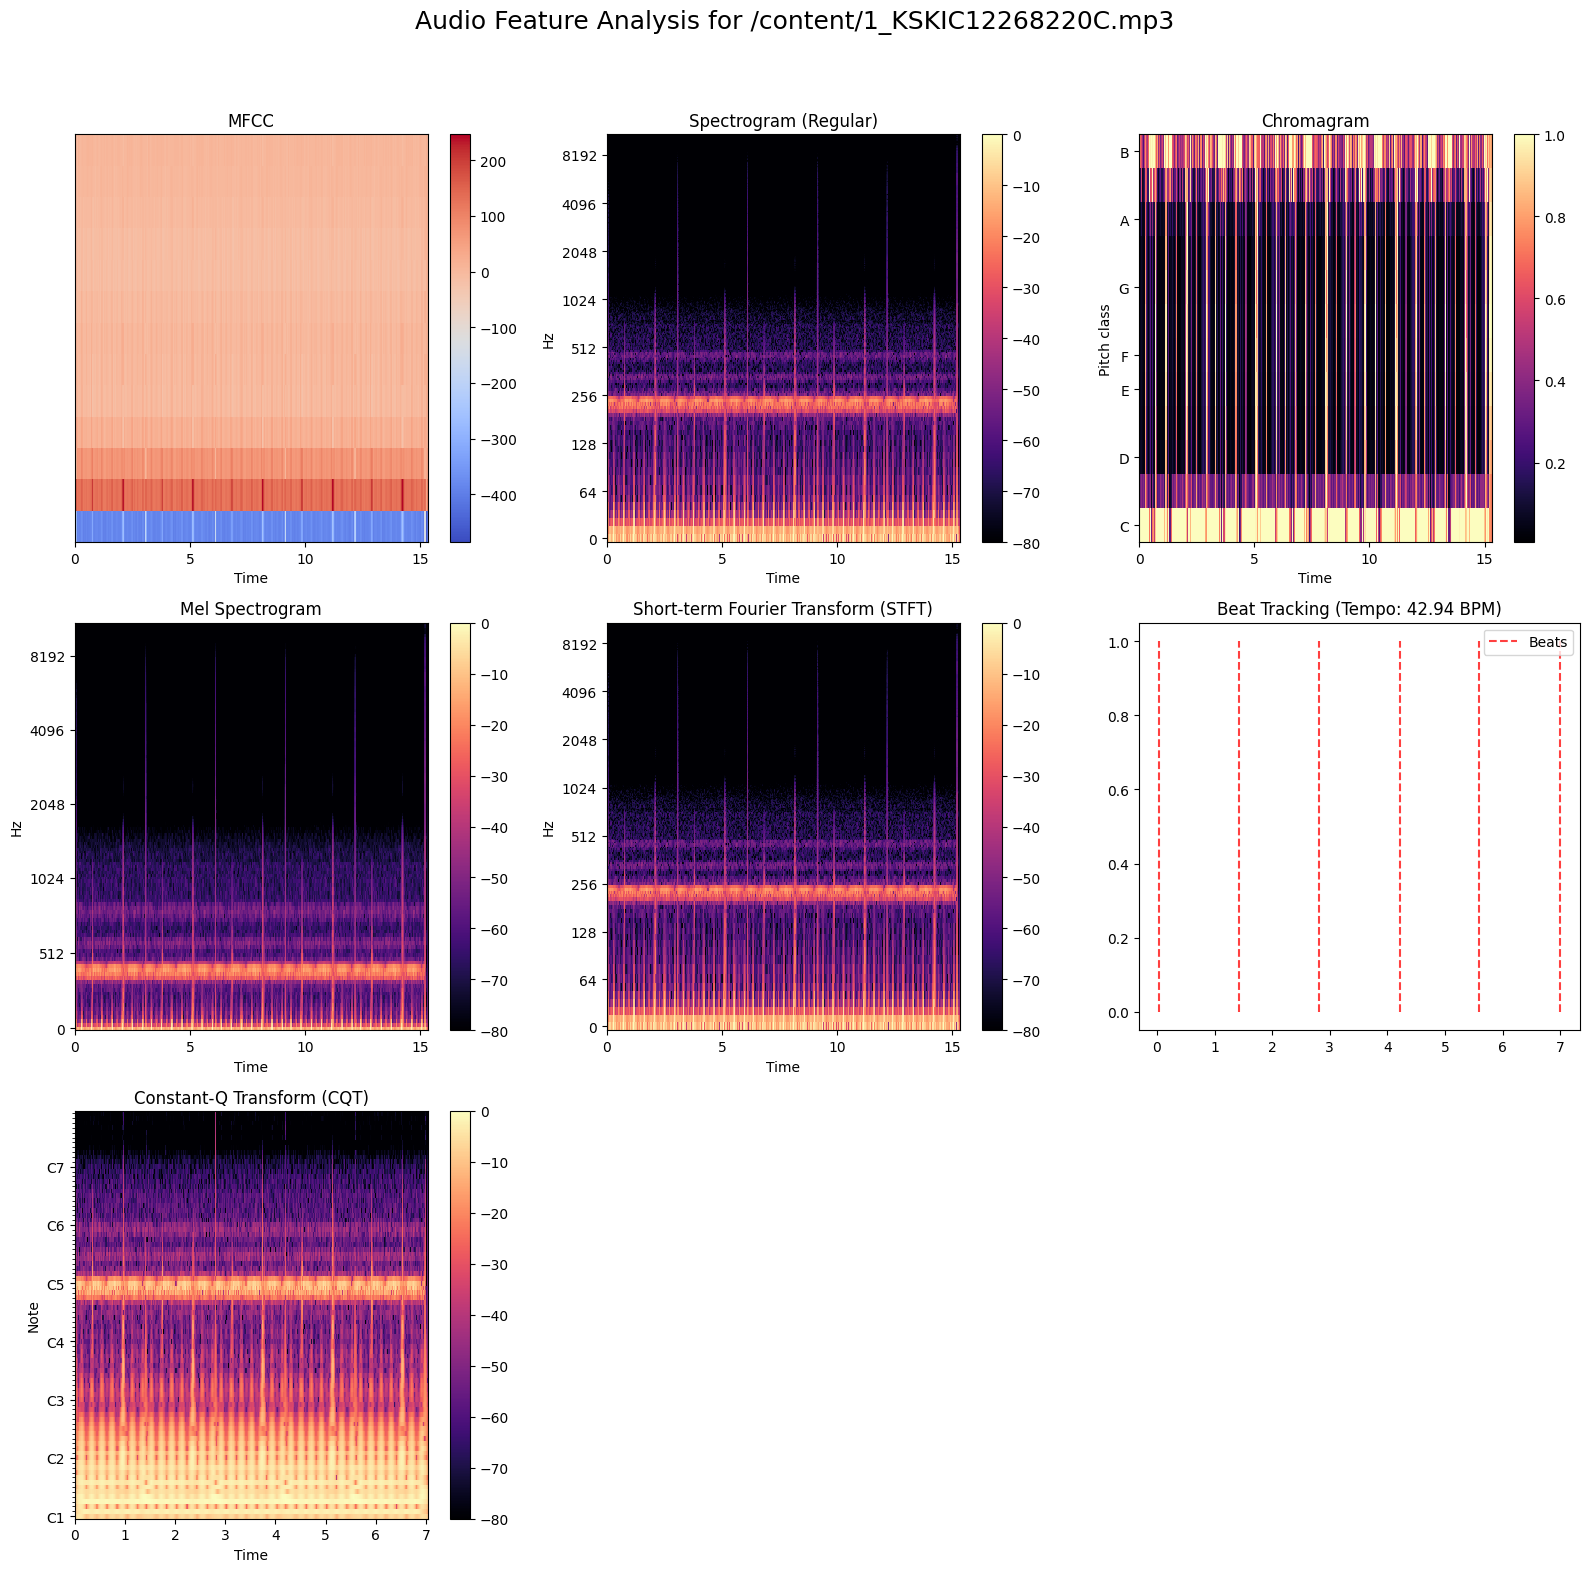

Processing /content/2_KSKIC7671081B.mp3...


<ipython-input-4-df490df98f97>:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  features['tempo'] = float(tempo)  # Ensure tempo is a float


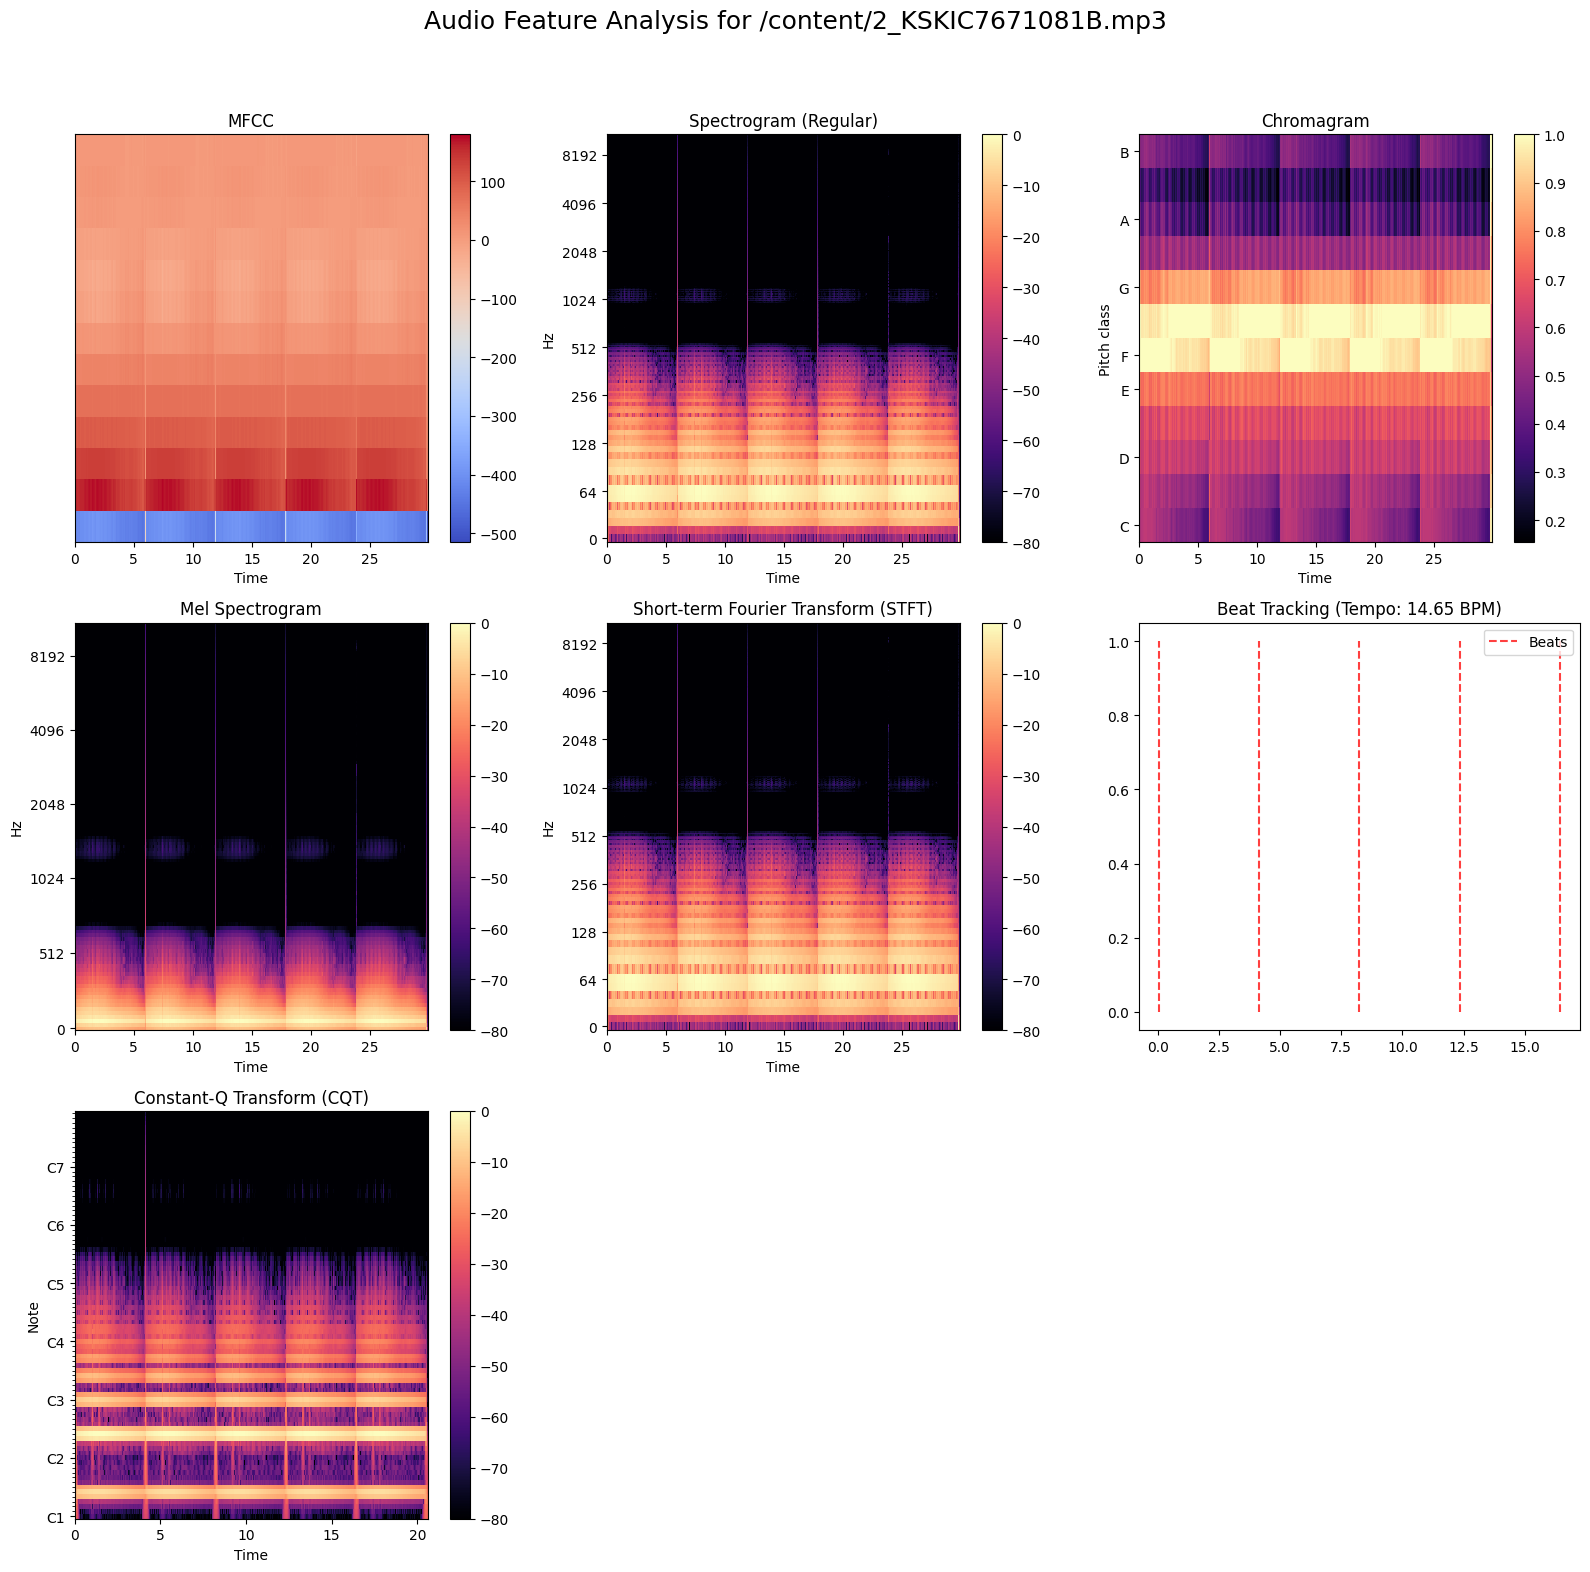

Processing /content/3NSWhistler_Waves.mp3...


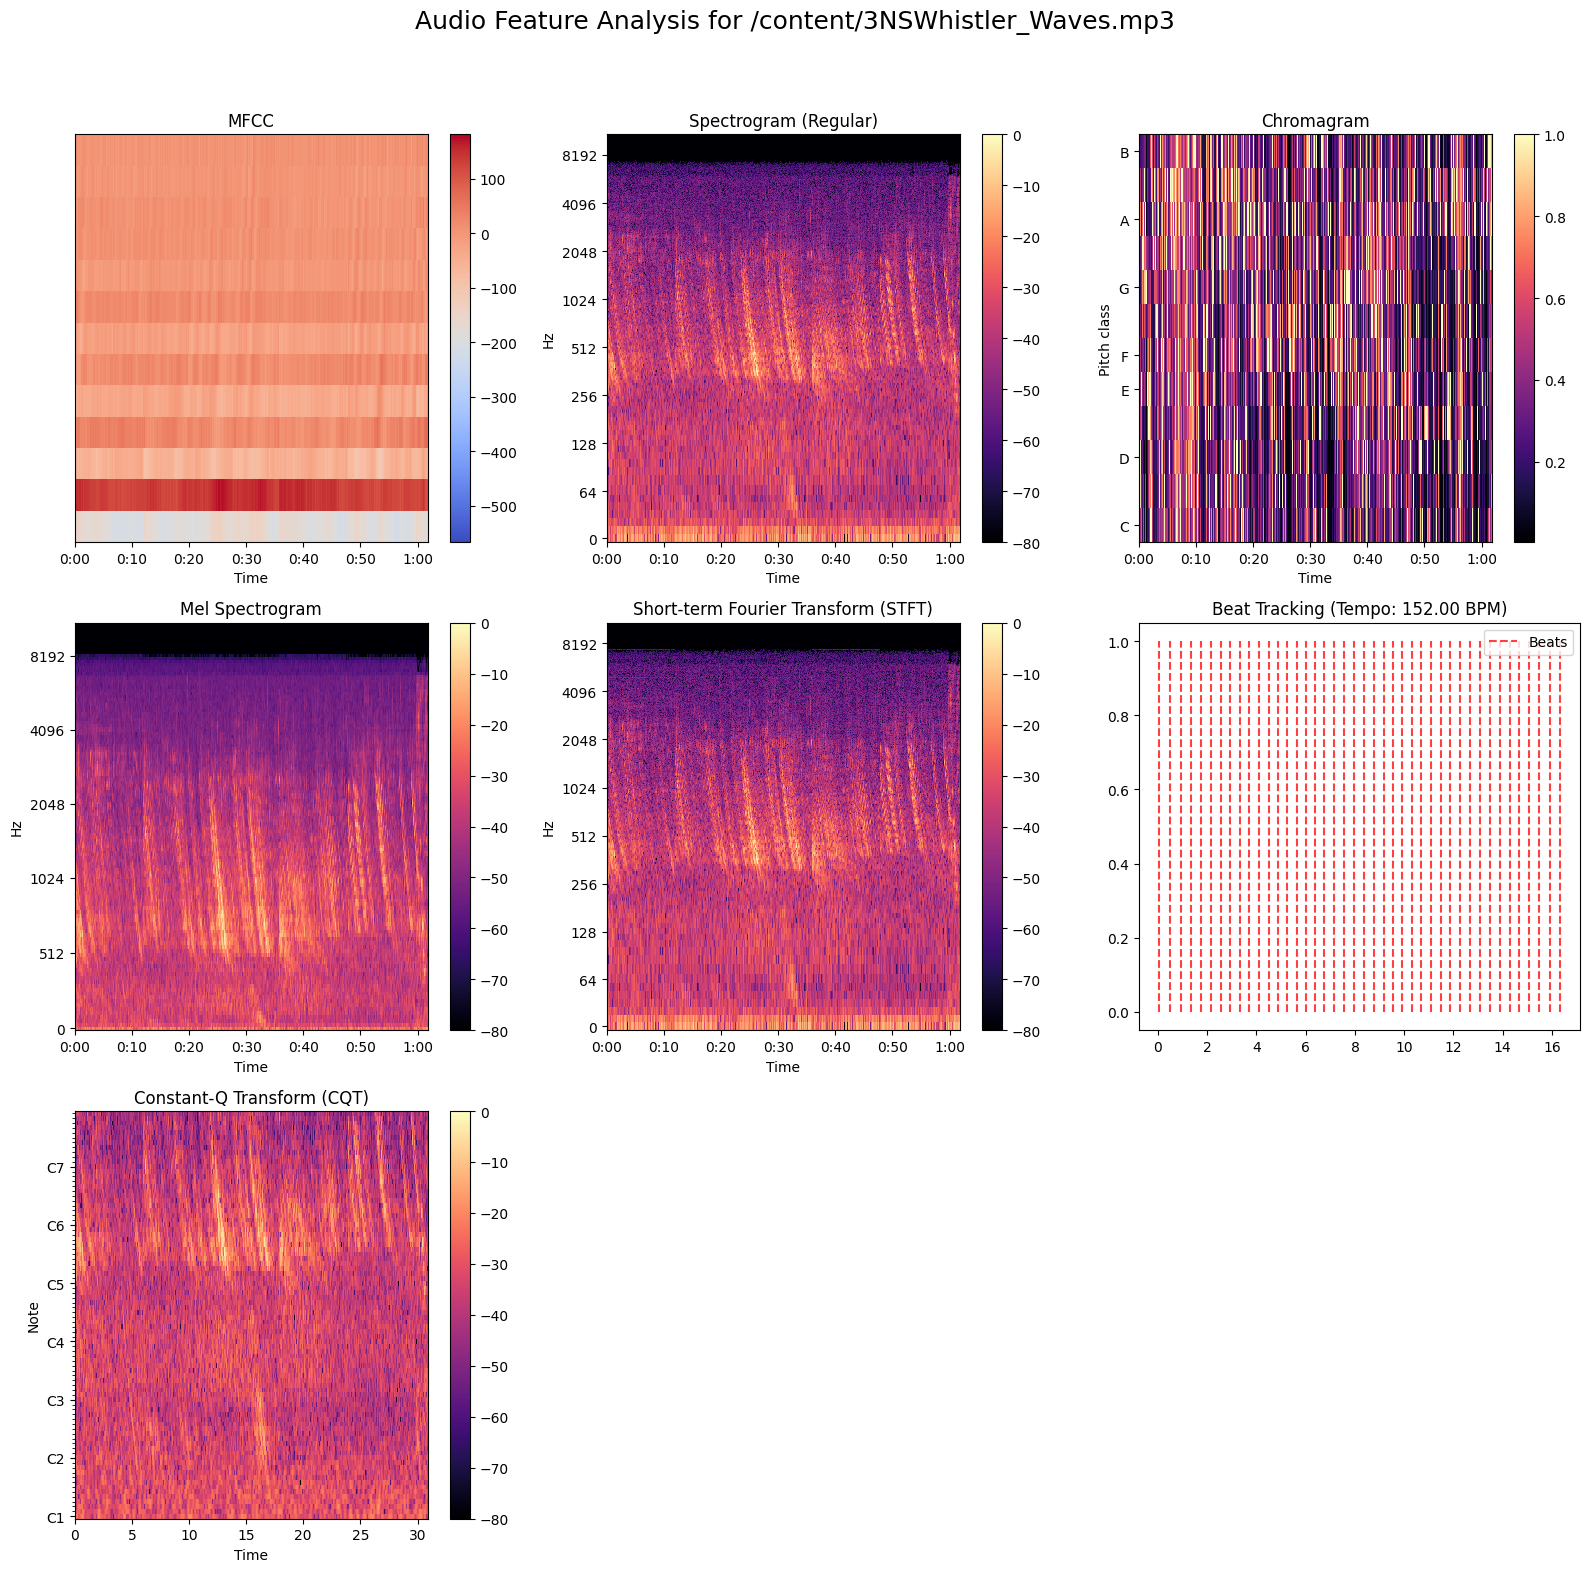

Processing /content/4_PSPWhistler Mode W2.mp3...


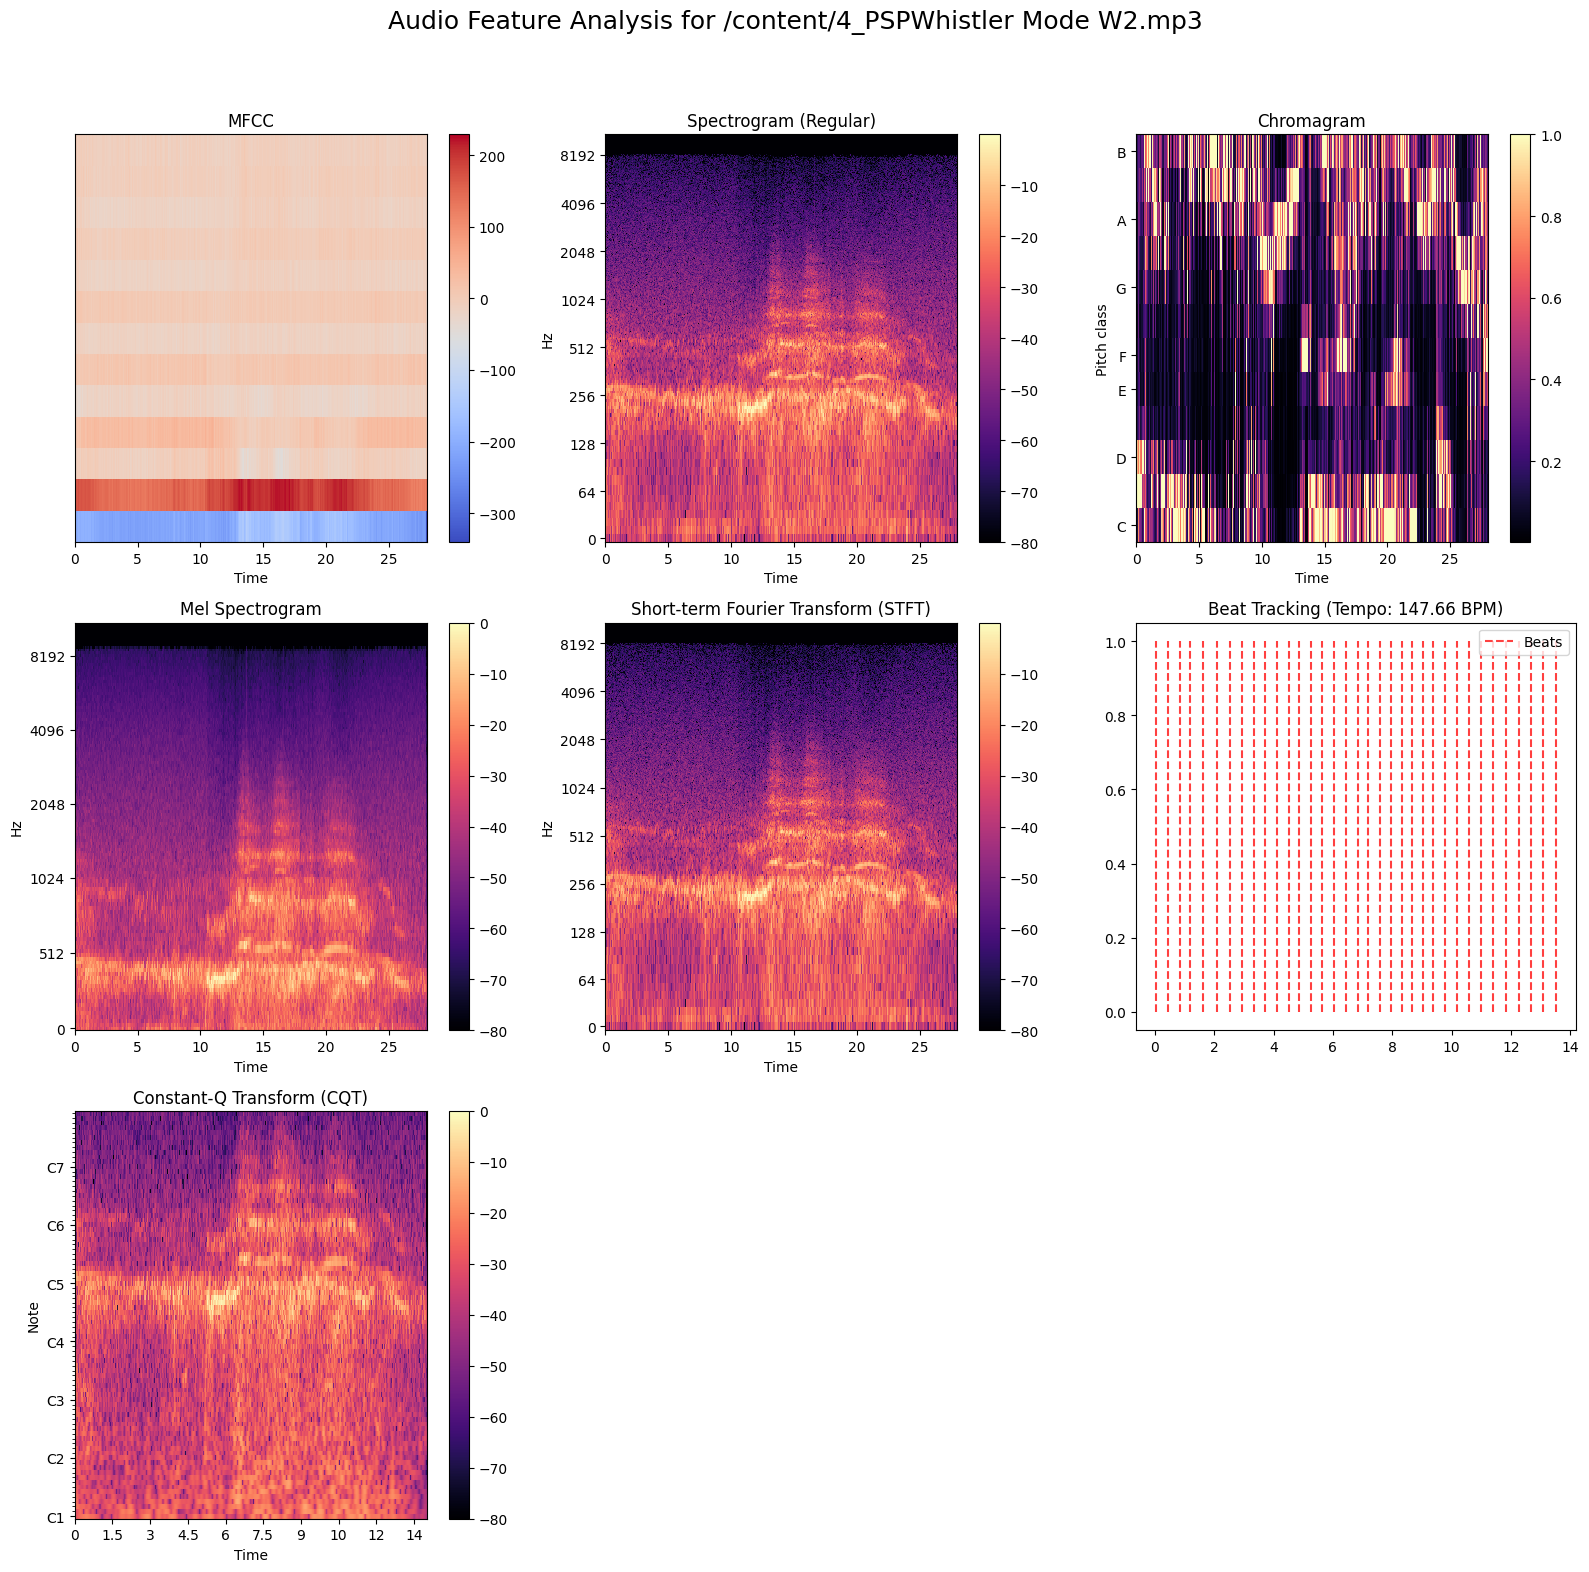

Processing /content/5_Juno Mission Europa Flyby.mp3...


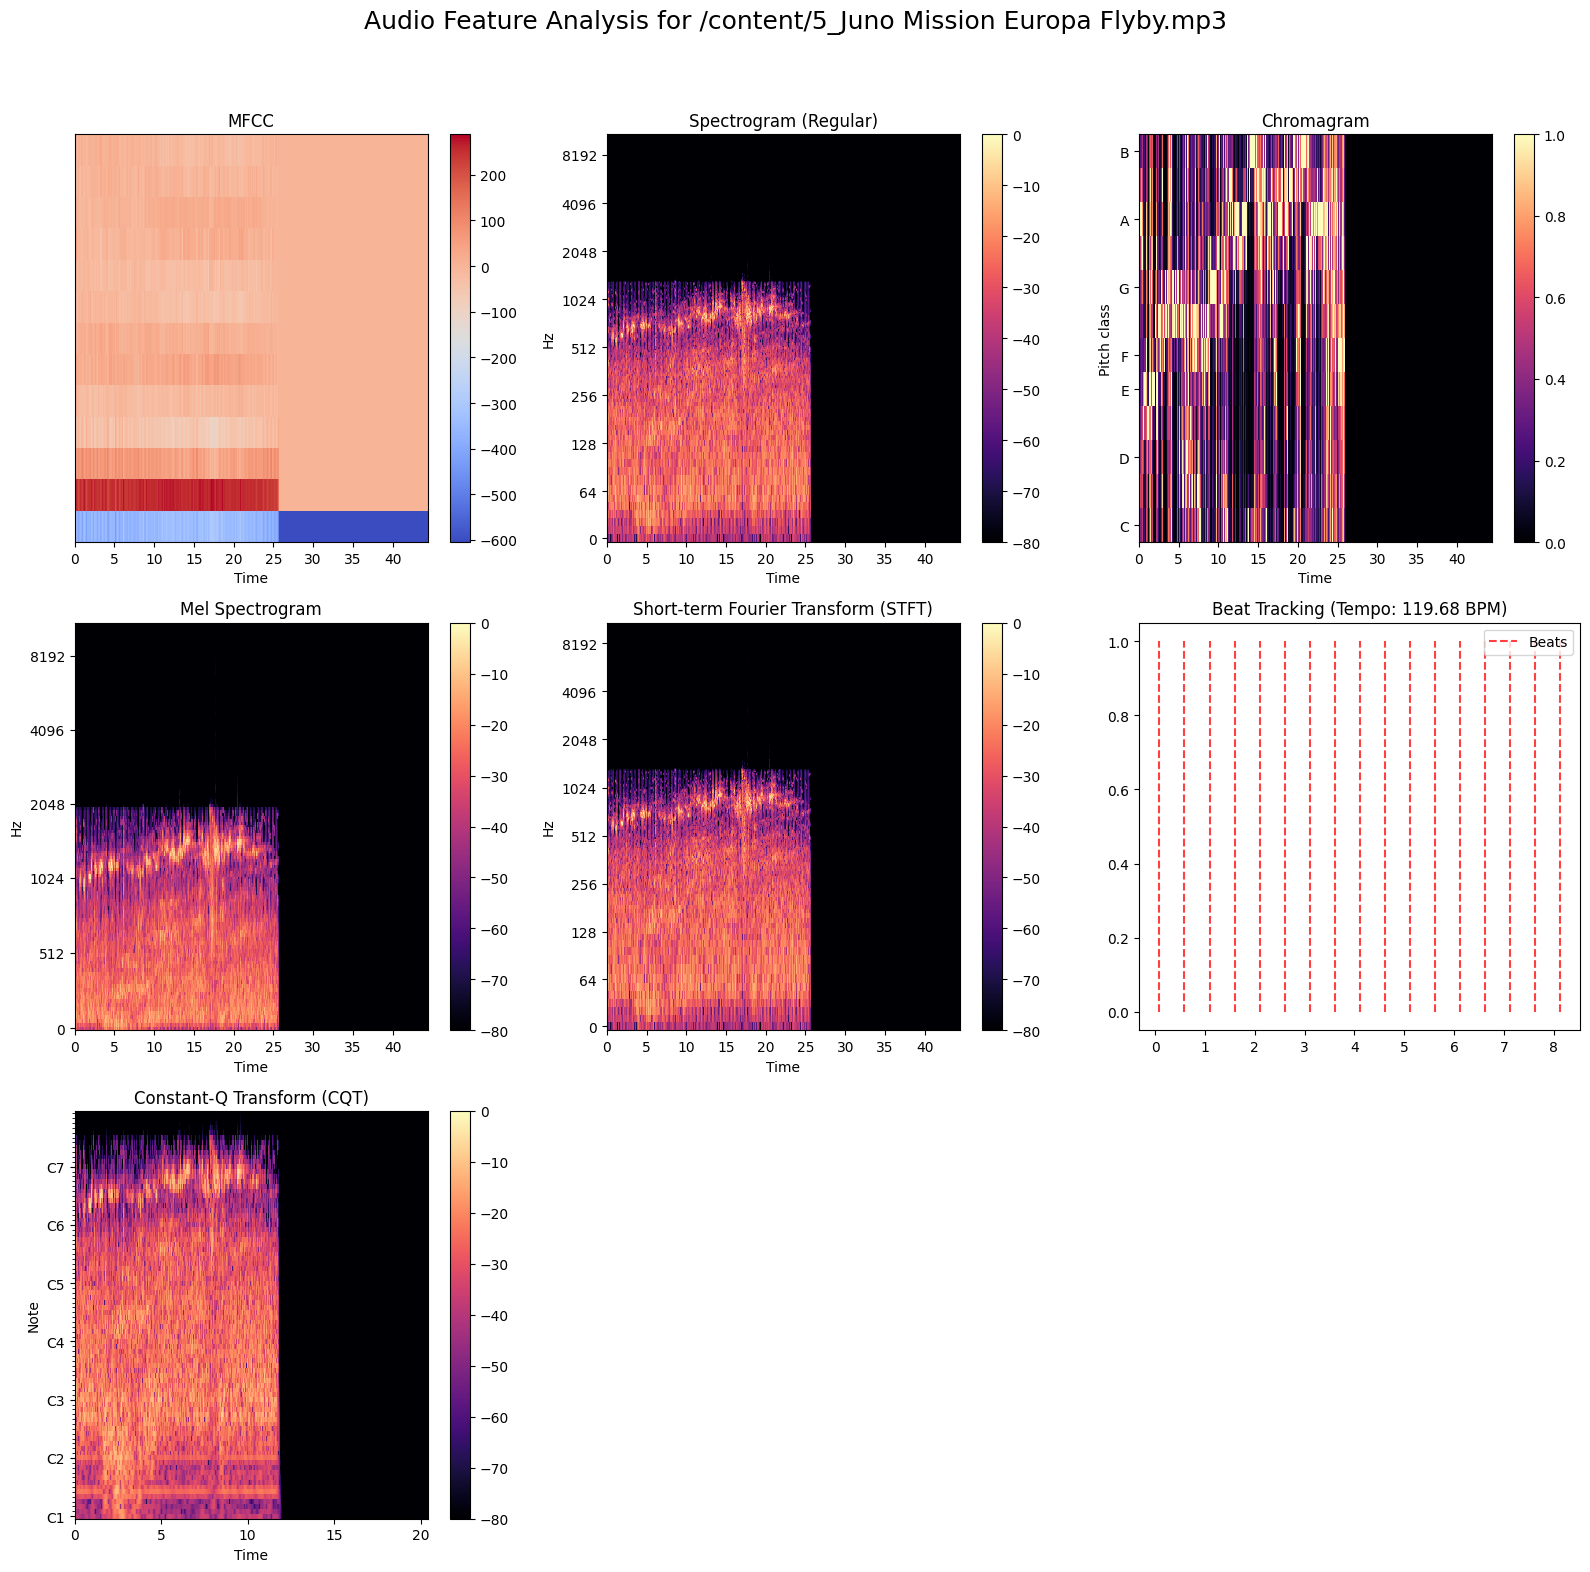

In [7]:
# This function calls the above calculating features, and plotting functions.
def process_and_plot(file_path):

    # Audio data load
    y, sr = load_audio(file_path)

    # Calculating part
    features = calculate_features(y, sr)

    # Plot part
    plot_features(features, sr, file_path)

# giving path for the 5 different data sources
audio_files = [
    '/content/1_KSKIC12268220C.mp3',
    '/content/2_KSKIC7671081B.mp3',
    '/content/3NSWhistler_Waves.mp3',
    '/content/4_PSPWhistler Mode W2.mp3',
    '/content/5_Juno Mission Europa Flyby.mp3'
]

# loops through the given audio files in the order
for file in audio_files:
    print(f"Processing {file}...")
    process_and_plot(file)